## Abstract

The aim of this project is to determine if there are certain musical features that have changed over the past 10 year in the top 100 most popular song. To achieve this goal, this code scrapes data from the Billboard top 100 charts from the years 2014 to 2023 and creates a data frame. It then uses Spotify's API to request song-specific data features and graphs the average of each feature over time.

### Billboard Top 100 Data Collection

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests

def extract_songs_and_artists(url):
    top_100_by_year = {}
    for i in range(1, 11):
        year = int(url.split('/')[-3])                                                          # PROCESSING
        # Sending a GET request to the URL
        response = requests.get(url)

        # Checking if the request was successful
        if response.status_code == 200:
            url = response.text
        else:
            print(f"Failed to retrieve the webpage: Status code {response.status_code}")

        # Parse the HTML content
        soup = BeautifulSoup(url, 'html.parser')

        # Initialize lists to store songs, artists, and track ID's
        songs = []
        artists = []

        # Find all <h3> tags and process only the first 100
        for index, h3_tag in enumerate(soup.find_all('h3')):
            if index >= 100:  # Break the loop after processing 100 h3 tags
                break

            song_name = h3_tag.get_text(strip=True)
            if song_name:
                songs.append(song_name)

                # Assuming the artist name follows in a <span> tag
                next_span = h3_tag.find_next_sibling('span')
                if next_span:
                    artists.append(next_span.get_text(strip=True))
                else:
                    artists.append(None)  # In case no artist name is found

        # Create a DataFrame
        df = pd.DataFrame({
            'Song Name': songs,
            'Artist Name': artists
        })

        # Append df to top_100_by_year
        top_100_by_year[str(year)] = df

        # Define past year for href reference
        past_year = year - 1

        # Find the <a> tag with the specified text and href
        for a_tag in soup.find_all('a'):
            if str(past_year) in a_tag.get_text() and 'hot-100-songs' in a_tag['href']:
                # Set the <a> tag as the new url
                url = a_tag['href'] if a_tag else "Not found"


    return top_100_by_year

url = "https://www.billboard.com/charts/year-end/2023/hot-100-songs/"


songs_df = extract_songs_and_artists(url)

# Print song information dataframe for each year
for year, df in songs_df.items():
    print(f"Year: {year}")
    display(df)

Year: 2023


,Song Name,Artist Name
0,Last Night,Morgan Wallen
1,Flowers,Miley Cyrus
2,Kill Bill,SZA
3,Anti-Hero,Taylor Swift
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage"
...,...,...
95,"Bzrp Music Sessions, Vol. 53",Bizarrap & Shakira
96,Meltdown,Travis Scott Featuring Drake
97,Put It On Da Floor Again,Latto Featuring Cardi B
98,Bloody Mary,Lady Gaga


Year: 2022


,Song Name,Artist Name
0,Heat Waves,Glass Animals
1,As It Was,Harry Styles
2,Stay,The Kid LAROI & Justin Bieber
3,Easy On Me,Adele
4,Shivers,Ed Sheeran
...,...,...
95,Flower Shops,ERNEST Featuring Morgan Wallen
96,To The Moon!,JNR CHOI & Sam Tompkins
97,Unholy,Sam Smith & Kim Petras
98,One Mississippi,Kane Brown


Year: 2021


,Song Name,Artist Name
0,Levitating,Dua Lipa
1,Save Your Tears,The Weeknd & Ariana Grande
2,Blinding Lights,The Weeknd
3,Mood,24kGoldn Featuring iann dior
4,Good 4 U,Olivia Rodrigo
...,...,...
95,Things A Man Oughta Know,Lainey Wilson
96,Throat Baby (Go Baby),BRS Kash
97,Tombstone,Rod Wave
98,Drinkin' Beer. Talkin' God. Amen.,Chase Rice Featuring Florida Georgia Line


Year: 2020


,Song Name,Artist Name
0,Blinding Lights,The Weeknd
1,Circles,Post Malone
2,The Box,Roddy Ricch
3,Don't Start Now,Dua Lipa
4,Rockstar,DaBaby Featuring Roddy Ricch
...,...,...
95,More Than My Hometown,Morgan Wallen
96,Lovin' On You,Luke Combs
97,Said Sum,Moneybagg Yo
98,Slide,H.E.R. Featuring YG


Year: 2019


,Song Name,Artist Name
0,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus
1,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee
2,Without Me,Halsey
3,Bad Guy,Billie Eilish
4,Wow.,Post Malone
...,...,...
95,Eyes On You,Chase Rice
96,All To Myself,Dan + Shay
97,Boyfriend,Ariana Grande & Social House
98,Walk Me Home,P!nk


Year: 2018


,Song Name,Artist Name
0,God's Plan,Drake
1,Perfect,Ed Sheeran
2,Meant To Be,Bebe Rexha & Florida Georgia Line
3,Havana,Camila Cabello Featuring Young Thug
4,Rockstar,Post Malone Featuring 21 Savage
...,...,...
95,One Number Away,Luke Combs
96,Powerglide,Rae Sremmurd & Juicy J
97,IDGAF,Dua Lipa
98,Mi Gente,J Balvin & Willy William Featuring Beyonce


Year: 2017


,Song Name,Artist Name
0,Shape Of You,Ed Sheeran
1,Despacito,Luis Fonsi & Daddy Yankee Featuring Justin Bieber
2,That's What I Like,Bruno Mars
3,Humble.,Kendrick Lamar
4,Something Just Like This,The Chainsmokers & Coldplay
...,...,...
95,Havana,Camila Cabello Featuring Young Thug
96,What Lovers Do,Maroon 5 Featuring SZA
97,Do Re Mi,blackbear
98,Look At Me!,XXXTENTACION


Year: 2016


,Song Name,Artist Name
0,Love Yourself,Justin Bieber
1,Sorry,Justin Bieber
2,One Dance,Drake Featuring WizKid & Kyla
3,Work,Rihanna Featuring Drake
4,Stressed Out,twenty one pilots
...,...,...
95,Wicked,Future
96,Tiimmy Turner,Desiigner
97,See You Again,Wiz Khalifa Featuring Charlie Puth
98,Perfect,One Direction


Year: 2015


,Song Name,Artist Name
0,Uptown Funk!,Mark Ronson Featuring Bruno Mars
1,Thinking Out Loud,Ed Sheeran
2,See You Again,Wiz Khalifa Featuring Charlie Puth
3,Trap Queen,Fetty Wap
4,Sugar,Maroon 5
...,...,...
95,El Perdon (Forgiveness),Nicky Jam & Enrique Iglesias
96,She Knows,Ne-Yo Featuring Juicy J
97,Night Changes,One Direction
98,Back To Back,Drake


Year: 2014


,Song Name,Artist Name
0,Happy,Pharrell Williams
1,Dark Horse,Katy Perry Featuring Juicy J
2,All Of Me,John Legend
3,Fancy,Iggy Azalea Featuring Charli XCX
4,Counting Stars,OneRepublic
...,...,...
95,Studio,ScHoolboy Q Featuring BJ The Chicago Kid
96,0 To 100 / The Catch Up,Drake
97,I Don't Dance,Lee Brice
98,Somethin' Bad,Miranda Lambert Duet With Carrie Underwood


### Spotify Song ID Data Collection

In [6]:
# Iterate for each dataframe in songs_df
songs_df_cut = {year: songs_df[year] for year in ['2014']}

def get_spotify_track_id(song_name, artist_name):
    # Format the query for proper results
    query = f"{song_name} artist%3A%20{artist_name}"
    query = query.replace(" ", "%20")

    url = f"https://api.spotify.com/v1/search?q={query}&type=track"
    headers = {"Authorization": f"Bearer {access_token}"}
    response = requests.get(url, headers=headers)
    results = response.json()

    # Extracting the Spotify ID of the first track in the search results
    if 'tracks' in results and 'items' in results['tracks'] and results['tracks']['items']:
        track_id = results['tracks']['items'][0]['id']
        return track_id
    else:
        return None

# This is my personal token
client_id = "7d3828cd7d8e4a09a7d185991ef6e9a1"
client_secret = "e1eab363173b46eb83b0d392ab4351c2"

auth_url = 'https://accounts.spotify.com/api/token'
data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
}

auth_response = requests.post(auth_url, data=data)
access_token = auth_response.json().get('access_token')

# Iterate for each dataframe in songs_df
for year, df in songs_df.items():
    # Iterate over each row (observation) in the DataFrame
    for index, row in df.iterrows():
        # Get the song name and artist name from the current row
        song_name = row['Song Name']
        artist_name = row['Artist Name']

        # Get the Spotify track ID using song name and artist name
        track_id = get_spotify_track_id(song_name, artist_name)

        # Add the track ID as a new feature (column) to the current row
        df.at[index, 'Song ID'] = track_id

# Print song information dataframe for each year
for year, df in songs_df.items():
    print(f"Year: {year}")
    display(df)

Year: 2023


,Song Name,Artist Name,Song ID
0,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8
1,Flowers,Miley Cyrus,7oAZ8gLMBqSTDQUMvsqLT6
2,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL
3,Anti-Hero,Taylor Swift,0V3wPSX9ygBnCm8psDIegu
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage",5r2uftQ7dU1fFOQcSNjWPl
...,...,...,...
95,"Bzrp Music Sessions, Vol. 53",Bizarrap & Shakira,6VciS3dRMpZhJiDxT8ArFi
96,Meltdown,Travis Scott Featuring Drake,6w3hTgFYPaUo6WFz2tEOtX
97,Put It On Da Floor Again,Latto Featuring Cardi B,6c6WmIHcHlhccEwSFBhzNa
98,Bloody Mary,Lady Gaga,11BKm0j4eYoCPPpCONAVwA


Year: 2022


,Song Name,Artist Name,Song ID
0,Heat Waves,Glass Animals,3USxtqRwSYz57Ewm6wWRMp
1,As It Was,Harry Styles,4Dvkj6JhhA12EX05fT7y2e
2,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20
3,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX
4,Shivers,Ed Sheeran,59zbXPD0j7JxsVVm480g3b
...,...,...,...
95,Flower Shops,ERNEST Featuring Morgan Wallen,0De9jFjJ4eRLl7Yww2eBw1
96,To The Moon!,JNR CHOI & Sam Tompkins,5vUnjhBzRJJIAOJPde6zDx
97,Unholy,Sam Smith & Kim Petras,0NZPBYD5qbEWRs3PrGiRkT
98,One Mississippi,Kane Brown,5ekA7j4MPQa3NZbZQSpRfF


Year: 2021


,Song Name,Artist Name,Song ID
0,Levitating,Dua Lipa,5KknavP48RJhLVk4uBSviu
1,Save Your Tears,The Weeknd & Ariana Grande,5QO79kh1waicV47BqGRL3g
2,Blinding Lights,The Weeknd,02nMYbIiYIzaFA3D3Bkn6W
3,Mood,24kGoldn Featuring iann dior,4jPy3l0RUwlUI9T5XHBW2m
4,Good 4 U,Olivia Rodrigo,4ZtFanR9U6ndgddUvNcjcG
...,...,...,...
95,Things A Man Oughta Know,Lainey Wilson,5DIBVDJOHh7djepAjKHWCO
96,Throat Baby (Go Baby),BRS Kash,3ZeQyvZicIaMgUmAIUg2CN
97,Tombstone,Rod Wave,5gUiTylvifZnUrynE4FFPu
98,Drinkin' Beer. Talkin' God. Amen.,Chase Rice Featuring Florida Georgia Line,0rOVgtieEk5SoypbulRiKI


Year: 2020


,Song Name,Artist Name,Song ID
0,Blinding Lights,The Weeknd,02nMYbIiYIzaFA3D3Bkn6W
1,Circles,Post Malone,21jGcNKet2qwijlDFuPiPb
2,The Box,Roddy Ricch,0nbXyq5TXYPCO7pr3N8S4I
3,Don't Start Now,Dua Lipa,3PfIrDoz19wz7qK7tYeu62
4,Rockstar,DaBaby Featuring Roddy Ricch,7ytR5pFWmSjzHJIeQkgog4
...,...,...,...
95,More Than My Hometown,Morgan Wallen,5OELUCYgOHKFAvCERnAvfS
96,Lovin' On You,Luke Combs,0nYvjcSlCgjcwogQAwIwNp
97,Said Sum,Moneybagg Yo,3sKz6Sd72K0ofPWcJPPk6H
98,Slide,H.E.R. Featuring YG,2rTnVB1bvwxHtaIl4uVu7f


Year: 2019


,Song Name,Artist Name,Song ID
0,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,2YpeDb67231RjR0MgVLzsG
1,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,0RiRZpuVRbi7oqRdSMwhQY
2,Without Me,Halsey,6FZDfxM3a3UCqtzo5pxSLZ
3,Bad Guy,Billie Eilish,2Fxmhks0bxGSBdJ92vM42m
4,Wow.,Post Malone,7xQAfvXzm3AkraOtGPWIZg
...,...,...,...
95,Eyes On You,Chase Rice,4w95iGC6NrxZJ5o3D7bWyV
96,All To Myself,Dan + Shay,08tq1XcHwVt5PHXUo87i0D
97,Boyfriend,Ariana Grande & Social House,0Ryd8975WihbObpp5cPW1t
98,Walk Me Home,P!nk,6jfEZdUJ2Yla6h7gTJgKuo


Year: 2018


,Song Name,Artist Name,Song ID
0,God's Plan,Drake,6DCZcSspjsKoFjzjrWoCdn
1,Perfect,Ed Sheeran,5T6bJp3XgwT0IaCfKMxmAu
2,Meant To Be,Bebe Rexha & Florida Georgia Line,4e4fqjx0Izh4svvTef1z7e
3,Havana,Camila Cabello Featuring Young Thug,1rfofaqEpACxVEHIZBJe6W
4,Rockstar,Post Malone Featuring 21 Savage,0DC6XJuyJIotOK74ahqHEo
...,...,...,...
95,One Number Away,Luke Combs,0RmtUP9oQqhO3WFqB3KrM2
96,Powerglide,Rae Sremmurd & Juicy J,1BuZAIO8WZpavWVbbq3Lci
97,IDGAF,Dua Lipa,6Y7KcCuKVzzydZ1EGla3du
98,Mi Gente,J Balvin & Willy William Featuring Beyonce,7COfe3P7KgfwDwIRB8LIDw


Year: 2017


,Song Name,Artist Name,Song ID
0,Shape Of You,Ed Sheeran,1KqvRRQd3lfM0pAlkGPrgD
1,Despacito,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,6habFhsOp2NvshLv26DqMb
2,That's What I Like,Bruno Mars,0KKkJNfGyhkQ5aFogxQAPU
3,Humble.,Kendrick Lamar,6heRfvHrUIIPx9TqRg8SCq
4,Something Just Like This,The Chainsmokers & Coldplay,6RUKPb4LETWmmr3iAEQktW
...,...,...,...
95,Havana,Camila Cabello Featuring Young Thug,1rfofaqEpACxVEHIZBJe6W
96,What Lovers Do,Maroon 5 Featuring SZA,2j5hsQvApottzvTn4pFJWF
97,Do Re Mi,blackbear,6Se3x9ANMLv0dCDsjGmEjh
98,Look At Me!,XXXTENTACION,7floNISpH8VF4z4459Qo18


Year: 2016


,Song Name,Artist Name,Song ID
0,Love Yourself,Justin Bieber,50kpGaPAhYJ3sGmk6vplg0
1,Sorry,Justin Bieber,09CtPGIpYB4BrO8qb1RGsF
2,One Dance,Drake Featuring WizKid & Kyla,539UkWVh6FopB0mTR314jd
3,Work,Rihanna Featuring Drake,72TFWvU3wUYdUuxejTTIzt
4,Stressed Out,twenty one pilots,3CRDbSIZ4r5MsZ0YwxuEkn
...,...,...,...
95,Wicked,Future,6BbINUfGabVyiNFJpQXn3x
96,Tiimmy Turner,Desiigner,2vwvGMStv1nEuoOTd4xgMu
97,See You Again,Wiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc
98,Perfect,One Direction,3NLnwwAQbbFKcEcV8hDItk


Year: 2015


,Song Name,Artist Name,Song ID
0,Uptown Funk!,Mark Ronson Featuring Bruno Mars,32OlwWuMpZ6b0aN2RZOeMS
1,Thinking Out Loud,Ed Sheeran,34gCuhDGsG4bRPIf9bb02f
2,See You Again,Wiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc
3,Trap Queen,Fetty Wap,2d8JP84HNLKhmd6IYOoupQ
4,Sugar,Maroon 5,2iuZJX9X9P0GKaE93xcPjk
...,...,...,...
95,El Perdon (Forgiveness),Nicky Jam & Enrique Iglesias,7qCAVkHWZkF44OzOUKf8Cr
96,She Knows,Ne-Yo Featuring Juicy J,4ZTYSM6nsWjVAqf9BOY7qU
97,Night Changes,One Direction,7aee6sIrFxp6ohSIq3TmHd
98,Back To Back,Drake,5lFDtgWsjRJu8fPOAyJIAK


Year: 2014


,Song Name,Artist Name,Song ID
0,Happy,Pharrell Williams,60nZcImufyMA1MKQY3dcCH
1,Dark Horse,Katy Perry Featuring Juicy J,7EZPH9Px3gXlxD5KJDwtwc
2,All Of Me,John Legend,3U4isOIWM3VvDubwSI3y7a
3,Fancy,Iggy Azalea Featuring Charli XCX,3oiMJQAWVaxSubJ7b2VUtX
4,Counting Stars,OneRepublic,2tpWsVSb9UEmDRxAl1zhX1
...,...,...,...
95,Studio,ScHoolboy Q Featuring BJ The Chicago Kid,7u1P36qRqrSNrXAp98cyp1
96,0 To 100 / The Catch Up,Drake,4jtyUzZm9WLc2AdaJ1dso7
97,I Don't Dance,Lee Brice,14GwnOeC9qYEKEA6uOZepa
98,Somethin' Bad,Miranda Lambert Duet With Carrie Underwood,6s9m5J92By7jii22Q2XtY2


### Spotify Audio Features Data Collection

In [7]:
# Fetch the audio features of the track using its Spotify ID
def get_spotify_audio_features(song_id_list):
    audio_features_list = []
    url = f"https://api.spotify.com/v1/audio-features?ids={song_id_list}"
    headers = {"Authorization": f"Bearer {access_token}"}
    audio_features_response = requests.get(url, headers=headers)
    # Check if the request was successful
    if audio_features_response.status_code == 200:
        audio_features = audio_features_response.json()
        for track in audio_features['audio_features']:
            audio_features_list.append([
                    track['acousticness'],
                    track['danceability'],
                    track['energy'],
                    track['instrumentalness'],
                    track['liveness'],
                    track['loudness'],
                    track['speechiness'],
                    track['tempo'],
                    track['valence']
                ])
    return audio_features_list



for year, df in songs_df.items():
    song_id_list = ''
    for i in range(0, len(df['Song ID'])):
        if i != (len(df['Song ID']) - 1):
            song_id_list = song_id_list + df['Song ID'][i] + ","
        else:
            song_id_list = song_id_list + df['Song ID'][i]
    audio_features_list = get_spotify_audio_features(song_id_list)
    # Iterate over each row (observation) in the DataFrame
    for index, row in df.iterrows():
        # Add the track ID as a new feature (column) to the current row
        audio_features_attrib = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

        # Add the track audio features as new columns to the current row
        for i, feature in enumerate(audio_features_attrib): # use enumerate to include indexes for audio_features_list
            df.at[index, feature] = audio_features_list[index][i]
# Set the option to display 6 rows
pd.set_option('display.max_rows', 6)

# Print song information dataframe for each year
for year, df in songs_df.items():
    print(f"Year: {year}")
    display(df)

Year: 2023


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.45900,0.517,0.675,0.000000,0.1510,-5.382,0.0357,203.853,0.518
1,Flowers,Miley Cyrus,7oAZ8gLMBqSTDQUMvsqLT6,0.00358,0.703,0.274,0.890000,0.1880,-12.740,0.0466,118.308,0.555
2,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,0.05210,0.644,0.735,0.144000,0.1610,-5.747,0.0391,88.980,0.418
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Put It On Da Floor Again,Latto Featuring Cardi B,6c6WmIHcHlhccEwSFBhzNa,0.02820,0.849,0.614,0.000000,0.0603,-7.323,0.3170,111.363,0.472
98,Bloody Mary,Lady Gaga,11BKm0j4eYoCPPpCONAVwA,0.01070,0.591,0.637,0.000002,0.1130,-6.365,0.0300,99.998,0.432
99,Watermelon Moonshine,Lainey Wilson,3sYBFUXTv0STUoUINx9Qe8,0.47000,0.739,0.413,0.000025,0.1310,-6.709,0.0282,139.921,0.649


Year: 2022


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Heat Waves,Glass Animals,3USxtqRwSYz57Ewm6wWRMp,0.44000,0.761,0.525,0.000007,0.0921,-6.900,0.0944,80.870,0.531
1,As It Was,Harry Styles,4Dvkj6JhhA12EX05fT7y2e,0.34200,0.520,0.731,0.001010,0.3110,-5.338,0.0557,173.930,0.662
2,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,0.03830,0.591,0.764,0.000000,0.1030,-5.484,0.0483,169.928,0.478
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Unholy,Sam Smith & Kim Petras,0NZPBYD5qbEWRs3PrGiRkT,0.01100,0.712,0.463,0.000003,0.3010,-7.399,0.0797,131.199,0.206
98,One Mississippi,Kane Brown,5ekA7j4MPQa3NZbZQSpRfF,0.00204,0.463,0.840,0.000002,0.1970,-5.807,0.0385,99.991,0.575
99,Circles Around This Town,Maren Morris,13G5xv1wUKvJYbK0wYmioN,0.01500,0.591,0.814,0.000000,0.1170,-4.986,0.0468,149.900,0.815


Year: 2021


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Levitating,Dua Lipa,5KknavP48RJhLVk4uBSviu,0.99000,0.597,0.243,0.915000,0.1330,-18.266,0.0398,103.012,0.492
1,Save Your Tears,The Weeknd & Ariana Grande,5QO79kh1waicV47BqGRL3g,0.02120,0.680,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0.644
2,Blinding Lights,The Weeknd,02nMYbIiYIzaFA3D3Bkn6W,0.00833,0.605,0.784,0.000007,0.1140,-6.194,0.0592,170.999,0.873
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Tombstone,Rod Wave,5gUiTylvifZnUrynE4FFPu,0.03450,0.649,0.508,0.000036,0.0736,-10.232,0.0959,157.975,0.405
98,Drinkin' Beer. Talkin' God. Amen.,Chase Rice Featuring Florida Georgia Line,0rOVgtieEk5SoypbulRiKI,0.18500,0.627,0.678,0.000000,0.3740,-4.691,0.0294,100.032,0.724
99,Todo de Ti,Rauw Alejandro,4fSIb4hdOQ151TILNsSEaF,0.31000,0.780,0.718,0.000163,0.0932,-3.605,0.0506,127.949,0.342


Year: 2020


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Blinding Lights,The Weeknd,02nMYbIiYIzaFA3D3Bkn6W,0.00833,0.605,0.784,0.000007,0.1140,-6.194,0.0592,170.999,0.873
1,Circles,Post Malone,21jGcNKet2qwijlDFuPiPb,0.19200,0.695,0.762,0.002440,0.0863,-3.497,0.0395,120.042,0.553
2,The Box,Roddy Ricch,0nbXyq5TXYPCO7pr3N8S4I,0.10400,0.896,0.586,0.000000,0.7900,-6.687,0.0559,116.971,0.642
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Said Sum,Moneybagg Yo,3sKz6Sd72K0ofPWcJPPk6H,0.01850,0.929,0.667,0.000000,0.1000,-6.789,0.3530,126.998,0.274
98,Slide,H.E.R. Featuring YG,2rTnVB1bvwxHtaIl4uVu7f,0.08070,0.832,0.469,0.000008,0.2070,-9.141,0.3390,97.023,0.197
99,Walk Em Down,NLE Choppa Featuring Roddy Ricch,1Z0cZI0UzNbP9L8MzzGxqf,0.26800,0.867,0.744,0.000000,0.0713,-5.171,0.2270,84.005,0.645


Year: 2019


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,2YpeDb67231RjR0MgVLzsG,0.0533,0.878,0.619,0.000000,0.1130,-5.560,0.1020,136.041,0.639
1,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,0RiRZpuVRbi7oqRdSMwhQY,0.5330,0.755,0.522,0.000000,0.0685,-4.368,0.0575,89.960,0.925
2,Without Me,Halsey,6FZDfxM3a3UCqtzo5pxSLZ,0.2970,0.752,0.488,0.000009,0.0936,-7.050,0.0705,136.041,0.533
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Boyfriend,Ariana Grande & Social House,0Ryd8975WihbObpp5cPW1t,0.1190,0.400,0.795,0.000000,0.1590,-3.731,0.4610,190.097,0.702
98,Walk Me Home,P!nk,6jfEZdUJ2Yla6h7gTJgKuo,0.0519,0.652,0.453,0.000000,0.1790,-6.119,0.0445,88.038,0.432
99,Robbery,Juice WRLD,6iaSML1PIYq936g62BDtBq,0.3280,0.623,0.692,0.000000,0.1530,-5.122,0.0504,79.899,0.566


Year: 2018


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,God's Plan,Drake,6DCZcSspjsKoFjzjrWoCdn,0.0332,0.754,0.449,0.000083,0.5520,-9.211,0.1090,77.169,0.357
1,Perfect,Ed Sheeran,5T6bJp3XgwT0IaCfKMxmAu,0.4590,0.432,0.377,0.000000,0.1140,-5.790,0.0304,94.973,0.394
2,Meant To Be,Bebe Rexha & Florida Georgia Line,4e4fqjx0Izh4svvTef1z7e,0.0476,0.642,0.772,0.000000,0.0646,-6.610,0.0848,153.995,0.589
...,...,...,...,...,...,...,...,...,...,...,...,...
97,IDGAF,Dua Lipa,6Y7KcCuKVzzydZ1EGla3du,0.9940,0.643,0.174,0.951000,0.0844,-20.446,0.0528,97.001,0.328
98,Mi Gente,J Balvin & Willy William Featuring Beyonce,7COfe3P7KgfwDwIRB8LIDw,0.0168,0.548,0.704,0.000023,0.1430,-4.838,0.0777,104.666,0.288
99,Believer,Imagine Dragons,0pqnGHJpmpxLKifKRmU6WP,0.0622,0.776,0.780,0.000000,0.0810,-4.374,0.1280,124.949,0.666


Year: 2017


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Shape Of You,Ed Sheeran,1KqvRRQd3lfM0pAlkGPrgD,0.00574,0.682,0.812,0.000000,0.0553,-2.691,0.1180,104.891,0.347
1,Despacito,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,6habFhsOp2NvshLv26DqMb,0.19800,0.655,0.797,0.000000,0.0670,-4.787,0.1530,177.928,0.839
2,That's What I Like,Bruno Mars,0KKkJNfGyhkQ5aFogxQAPU,0.01300,0.853,0.560,0.000000,0.0944,-4.961,0.0406,134.066,0.860
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Do Re Mi,blackbear,6Se3x9ANMLv0dCDsjGmEjh,0.00522,0.745,0.593,0.000005,0.1230,-6.350,0.0524,111.001,0.170
98,Look At Me!,XXXTENTACION,7floNISpH8VF4z4459Qo18,0.25900,0.763,0.726,0.000000,0.0976,-6.405,0.2820,139.059,0.349
99,The Fighter,Keith Urban Featuring Carrie Underwood,5OUSPcqhYTOzpbXzoEvKim,0.03040,0.681,0.845,0.000000,0.1970,-5.147,0.0525,132.023,0.761


Year: 2016


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Love Yourself,Justin Bieber,50kpGaPAhYJ3sGmk6vplg0,0.8350,0.609,0.378,0.000000,0.2800,-9.828,0.4380,100.418,0.515
1,Sorry,Justin Bieber,09CtPGIpYB4BrO8qb1RGsF,0.0797,0.654,0.760,0.000000,0.2990,-3.669,0.0450,99.945,0.410
2,One Dance,Drake Featuring WizKid & Kyla,539UkWVh6FopB0mTR314jd,0.4270,0.837,0.556,0.797000,0.1100,-10.069,0.1000,124.791,0.605
...,...,...,...,...,...,...,...,...,...,...,...,...
97,See You Again,Wiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc,0.3690,0.689,0.481,0.000001,0.0649,-7.503,0.0815,80.025,0.283
98,Perfect,One Direction,3NLnwwAQbbFKcEcV8hDItk,0.0598,0.647,0.823,0.000000,0.1190,-5.231,0.0762,99.933,0.396
99,Bill Maher Fires CAA After Oscar Party Snub (E...,None,0ZDYNvHcrjfbN6CbErhqna,0.9520,0.424,0.254,0.813000,0.1060,-17.649,0.0423,86.352,0.053


Year: 2015


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Uptown Funk!,Mark Ronson Featuring Bruno Mars,32OlwWuMpZ6b0aN2RZOeMS,0.00801,0.856,0.609,0.000082,0.0344,-7.223,0.0824,114.988,0.928
1,Thinking Out Loud,Ed Sheeran,34gCuhDGsG4bRPIf9bb02f,0.47400,0.781,0.445,0.000000,0.1840,-6.061,0.0295,78.998,0.591
2,See You Again,Wiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc,0.36900,0.689,0.481,0.000001,0.0649,-7.503,0.0815,80.025,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Night Changes,One Direction,7aee6sIrFxp6ohSIq3TmHd,0.88000,0.682,0.490,0.000000,0.1130,-8.158,0.0303,119.924,0.627
98,Back To Back,Drake,5lFDtgWsjRJu8fPOAyJIAK,0.00855,0.893,0.480,0.000000,0.1160,-3.728,0.3560,86.976,0.382
99,How Deep Is Your Love,Calvin Harris & Disciples,22mek4IiqubGD9ctzxc69s,0.03920,0.738,0.868,0.001690,0.3880,-4.373,0.0731,122.003,0.336


Year: 2014


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Happy,Pharrell Williams,60nZcImufyMA1MKQY3dcCH,0.21900,0.647,0.822,0.000000,0.0908,-4.662,0.1830,160.019,0.962
1,Dark Horse,Katy Perry Featuring Juicy J,7EZPH9Px3gXlxD5KJDwtwc,0.00212,0.871,0.743,0.000000,0.1410,-5.442,0.2770,130.977,0.576
2,All Of Me,John Legend,3U4isOIWM3VvDubwSI3y7a,0.92200,0.422,0.264,0.000000,0.1320,-7.064,0.0322,119.930,0.331
...,...,...,...,...,...,...,...,...,...,...,...,...
97,I Don't Dance,Lee Brice,14GwnOeC9qYEKEA6uOZepa,0.29400,0.643,0.790,0.000000,0.1070,-6.079,0.0462,95.987,0.800
98,Somethin' Bad,Miranda Lambert Duet With Carrie Underwood,6s9m5J92By7jii22Q2XtY2,0.05270,0.680,0.888,0.000003,0.0575,-5.308,0.0550,90.076,0.484
99,Adore You,Miley Cyrus,5AnCLGg35ziFOloEnXK4uu,0.11100,0.583,0.655,0.000004,0.1130,-5.407,0.0315,119.759,0.201


### Data Summary and Observation

In [8]:
# Initialize an empty dictionary to store the analysis results
analysis_results = {}

# Set the option to display 20 rows
pd.set_option('display.max_rows', 20)

# Iterate over the dictionary and perform analysis for each DataFrame
for year, df in songs_df.items():
    analysis_results[year] = df.describe().drop('count')

# Print analysis dataframe for each year
for year, df in analysis_results.items():
    print(f"Year: {year}")
    display(df)

Year: 2023


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.265581,0.63539,0.615564,0.021675,0.174430,-6.919520,0.092691,129.792610,0.507389
std,0.265897,0.14965,0.185057,0.129619,0.116317,2.866519,0.106105,28.468286,0.223902
min,0.000164,0.24700,0.076300,0.000000,0.050400,-22.722000,0.026200,67.196000,0.038500
25%,0.050750,0.53150,0.505250,0.000000,0.098525,-7.894000,0.032875,107.515000,0.350000
50%,0.149500,0.64550,0.613500,0.000000,0.119500,-6.375500,0.046250,132.106500,0.509500
75%,0.473250,0.73825,0.745000,0.000011,0.234000,-5.328750,0.092725,147.989500,0.673250
max,0.981000,0.95400,0.987000,0.933000,0.602000,-2.565000,0.604000,203.853000,0.947000


Year: 2022


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.242999,0.669810,0.621116,0.038181,0.180469,-6.947510,0.085765,122.701120,0.522730
std,0.266626,0.134472,0.186359,0.181135,0.133741,3.667646,0.079337,30.816755,0.227717
min,0.000307,0.336000,0.026600,0.000000,0.026400,-31.543000,0.026800,67.196000,0.106000
25%,0.044250,0.584250,0.502000,0.000000,0.092900,-7.532750,0.035450,100.720750,0.373500
50%,0.114500,0.661500,0.656000,0.000000,0.117000,-6.042000,0.052600,120.828000,0.499500
75%,0.359000,0.766250,0.764250,0.000031,0.276500,-5.031000,0.090875,140.171500,0.690000
max,0.990000,0.951000,0.944000,0.949000,0.618000,-2.565000,0.346000,205.863000,0.956000


Year: 2021


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.238621,0.677140,0.582422,0.029199,0.179980,-7.040750,0.118090,119.972400,0.484840
std,0.248880,0.140049,0.153075,0.154574,0.134145,2.418476,0.124900,29.337722,0.223347
min,0.000602,0.332000,0.095200,0.000000,0.046100,-18.266000,0.023500,67.196000,0.062800
25%,0.033850,0.588500,0.504500,0.000000,0.100000,-8.106000,0.039525,94.017500,0.331000
50%,0.171000,0.687000,0.595500,0.000000,0.126500,-6.741500,0.057300,122.548500,0.470500
75%,0.324500,0.767500,0.695250,0.000006,0.207000,-5.483750,0.127750,139.931250,0.673000
max,0.990000,0.957000,0.893000,0.917000,0.782000,-2.922000,0.619000,183.937000,0.919000


Year: 2020


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.247386,0.702680,0.598840,0.012214,0.184184,-6.77170,0.125362,118.638030,0.488477
std,0.235654,0.125453,0.156395,0.076306,0.133882,2.70098,0.110553,27.302845,0.202262
min,0.001650,0.336000,0.151000,0.000000,0.064500,-17.74600,0.025900,75.019000,0.060500
25%,0.061050,0.615000,0.494750,0.000000,0.100000,-7.56800,0.041375,96.870750,0.333000
50%,0.169500,0.703500,0.589000,0.000000,0.128000,-6.26450,0.077750,117.469000,0.486500
75%,0.331500,0.795000,0.718500,0.000003,0.234750,-5.21325,0.168750,136.344250,0.636500
max,0.902000,0.941000,0.949000,0.657000,0.790000,-2.60700,0.487000,180.056000,0.874000


Year: 2019


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.222161,0.715800,0.616720,0.009973,0.149797,-6.120200,0.131110,119.889620,0.480897
std,0.224639,0.136353,0.145168,0.052577,0.096700,2.581003,0.119322,28.049698,0.211021
min,0.000677,0.340000,0.111000,0.000000,0.055900,-17.746000,0.026200,75.445000,0.079700
25%,0.051825,0.625250,0.526500,0.000000,0.092700,-7.067250,0.044975,97.069750,0.337250
50%,0.138500,0.723000,0.628500,0.000000,0.117000,-5.631000,0.070000,117.510000,0.463500
75%,0.343000,0.829000,0.710250,0.000000,0.166250,-4.652750,0.202000,140.028500,0.637500
max,0.978000,0.970000,0.904000,0.374000,0.582000,-1.746000,0.467000,202.015000,0.952000


Year: 2018


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.177377,0.718920,0.63240,0.018811,0.164596,-6.154280,0.123464,119.810540,0.456165
std,0.213489,0.132139,0.14713,0.130657,0.125089,2.398649,0.108115,30.457961,0.194563
min,0.000813,0.333000,0.17400,0.000000,0.021500,-20.446000,0.026600,64.934000,0.058500
25%,0.035075,0.637750,0.54050,0.000000,0.099975,-7.080750,0.048425,94.996000,0.340250
50%,0.089350,0.707500,0.63300,0.000000,0.119000,-5.701500,0.077750,120.149000,0.447000
75%,0.212500,0.817750,0.73550,0.000016,0.172250,-4.971250,0.165000,140.031750,0.567500
max,0.994000,0.963000,0.90900,0.951000,0.912000,-2.384000,0.530000,203.911000,0.926000


Year: 2017


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.159662,0.714450,0.632930,0.010215,0.149235,-6.166390,0.128258,119.263290,0.499811
std,0.173687,0.122772,0.143289,0.090786,0.107170,2.198064,0.116100,26.869836,0.205384
min,0.002120,0.358000,0.314000,0.000000,0.046400,-15.600000,0.027500,73.012000,0.066100
25%,0.028400,0.639500,0.532250,0.000000,0.094375,-6.871250,0.050550,99.930500,0.356750
50%,0.085500,0.729500,0.636000,0.000000,0.122000,-5.836000,0.072700,113.876500,0.488500
75%,0.214250,0.799000,0.744250,0.000010,0.165000,-4.779500,0.155250,139.937500,0.662250
max,0.719000,0.940000,0.886000,0.906000,0.912000,-2.512000,0.505000,186.038000,0.969000


Year: 2016


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.206076,0.654800,0.620230,0.021640,0.163797,-6.654800,0.111654,122.625940,0.472840
std,0.245288,0.136902,0.170289,0.116834,0.124656,2.696724,0.096873,27.656727,0.211185
min,0.001910,0.194000,0.128000,0.000000,0.037100,-18.036000,0.028200,74.989000,0.053000
25%,0.033475,0.583750,0.525750,0.000000,0.088575,-7.710250,0.044600,99.981500,0.296000
50%,0.105000,0.655500,0.652000,0.000000,0.120000,-5.880000,0.072000,119.493500,0.455500
75%,0.265250,0.729000,0.740250,0.000007,0.172750,-5.032750,0.133750,144.870000,0.607000
max,0.963000,0.934000,0.927000,0.813000,0.650000,-2.787000,0.449000,190.169000,0.962000


Year: 2015


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.191634,0.657430,0.648373,0.003578,0.177263,-6.122550,0.087938,123.902050,0.495816
std,0.244417,0.151454,0.180128,0.016714,0.140994,2.617493,0.086050,31.884585,0.234778
min,0.000185,0.213000,0.074300,0.000000,0.026000,-18.071000,0.029500,53.863000,0.034600
25%,0.015625,0.582750,0.563750,0.000000,0.089325,-7.076250,0.041250,99.738250,0.307000
50%,0.065050,0.678500,0.677000,0.000000,0.117000,-5.621000,0.055100,119.915000,0.496000
75%,0.323250,0.773500,0.786250,0.000022,0.216250,-4.734250,0.089975,140.031000,0.677500
max,0.922000,0.893000,0.962000,0.129000,0.694000,-2.315000,0.592000,205.846000,0.962000


Year: 2014


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.141646,0.643010,0.701930,0.012307,0.179506,-5.441810,0.081439,120.542720,0.525801
std,0.195923,0.142692,0.157984,0.076094,0.147889,1.871359,0.068558,28.194601,0.244436
min,0.000185,0.279000,0.147000,0.000000,0.021000,-13.228000,0.027900,74.897000,0.038100
25%,0.018850,0.545750,0.603500,0.000000,0.090250,-6.463500,0.039625,97.782750,0.331750
50%,0.064600,0.659500,0.717500,0.000001,0.122000,-5.337500,0.056250,120.027000,0.541000
75%,0.167000,0.742250,0.796750,0.000023,0.210000,-3.853000,0.093325,134.524250,0.721500
max,0.922000,0.964000,0.963000,0.611000,0.698000,-2.280000,0.390000,205.972000,0.962000


### Feature Means Dataframe

In [9]:
# Initialize a list to hold the mean values DataFrame for each year
mean_values_list = []

# Iterate over each year and extract the mean values
for year, features in analysis_results.items():
    mean_values = {feature: values.loc['mean'] for feature, values in features.items()}
    mean_values['Year'] = year  # Adding the year as a column
    mean_values_list.append(mean_values)

# Create a DataFrame from the list of mean values
mean_values_df = pd.DataFrame(mean_values_list)
mean_values_df.set_index('Year', inplace=True)  # Set the year as the index

# Display the resulting DataFrame
mean_values_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Year,,,,,,,,,
2023,0.265581,0.63539,0.615564,0.021675,0.174430,-6.91952,0.092691,129.79261,0.507389
2022,0.242999,0.66981,0.621116,0.038181,0.180469,-6.94751,0.085765,122.70112,0.522730
2021,0.238621,0.67714,0.582422,0.029199,0.179980,-7.04075,0.118090,119.97240,0.484840
2020,0.247386,0.70268,0.598840,0.012214,0.184184,-6.77170,0.125362,118.63803,0.488477
2019,0.222161,0.71580,0.616720,0.009973,0.149797,-6.12020,0.131110,119.88962,0.480897
2018,0.177377,0.71892,0.632400,0.018811,0.164596,-6.15428,0.123464,119.81054,0.456165
2017,0.159662,0.71445,0.632930,0.010215,0.149235,-6.16639,0.128258,119.26329,0.499811
2016,0.206076,0.65480,0.620230,0.021640,0.163797,-6.65480,0.111654,122.62594,0.472840
2015,0.191634,0.65743,0.648373,0.003578,0.177263,-6.12255,0.087938,123.90205,0.495816


### Feature Means Plotting

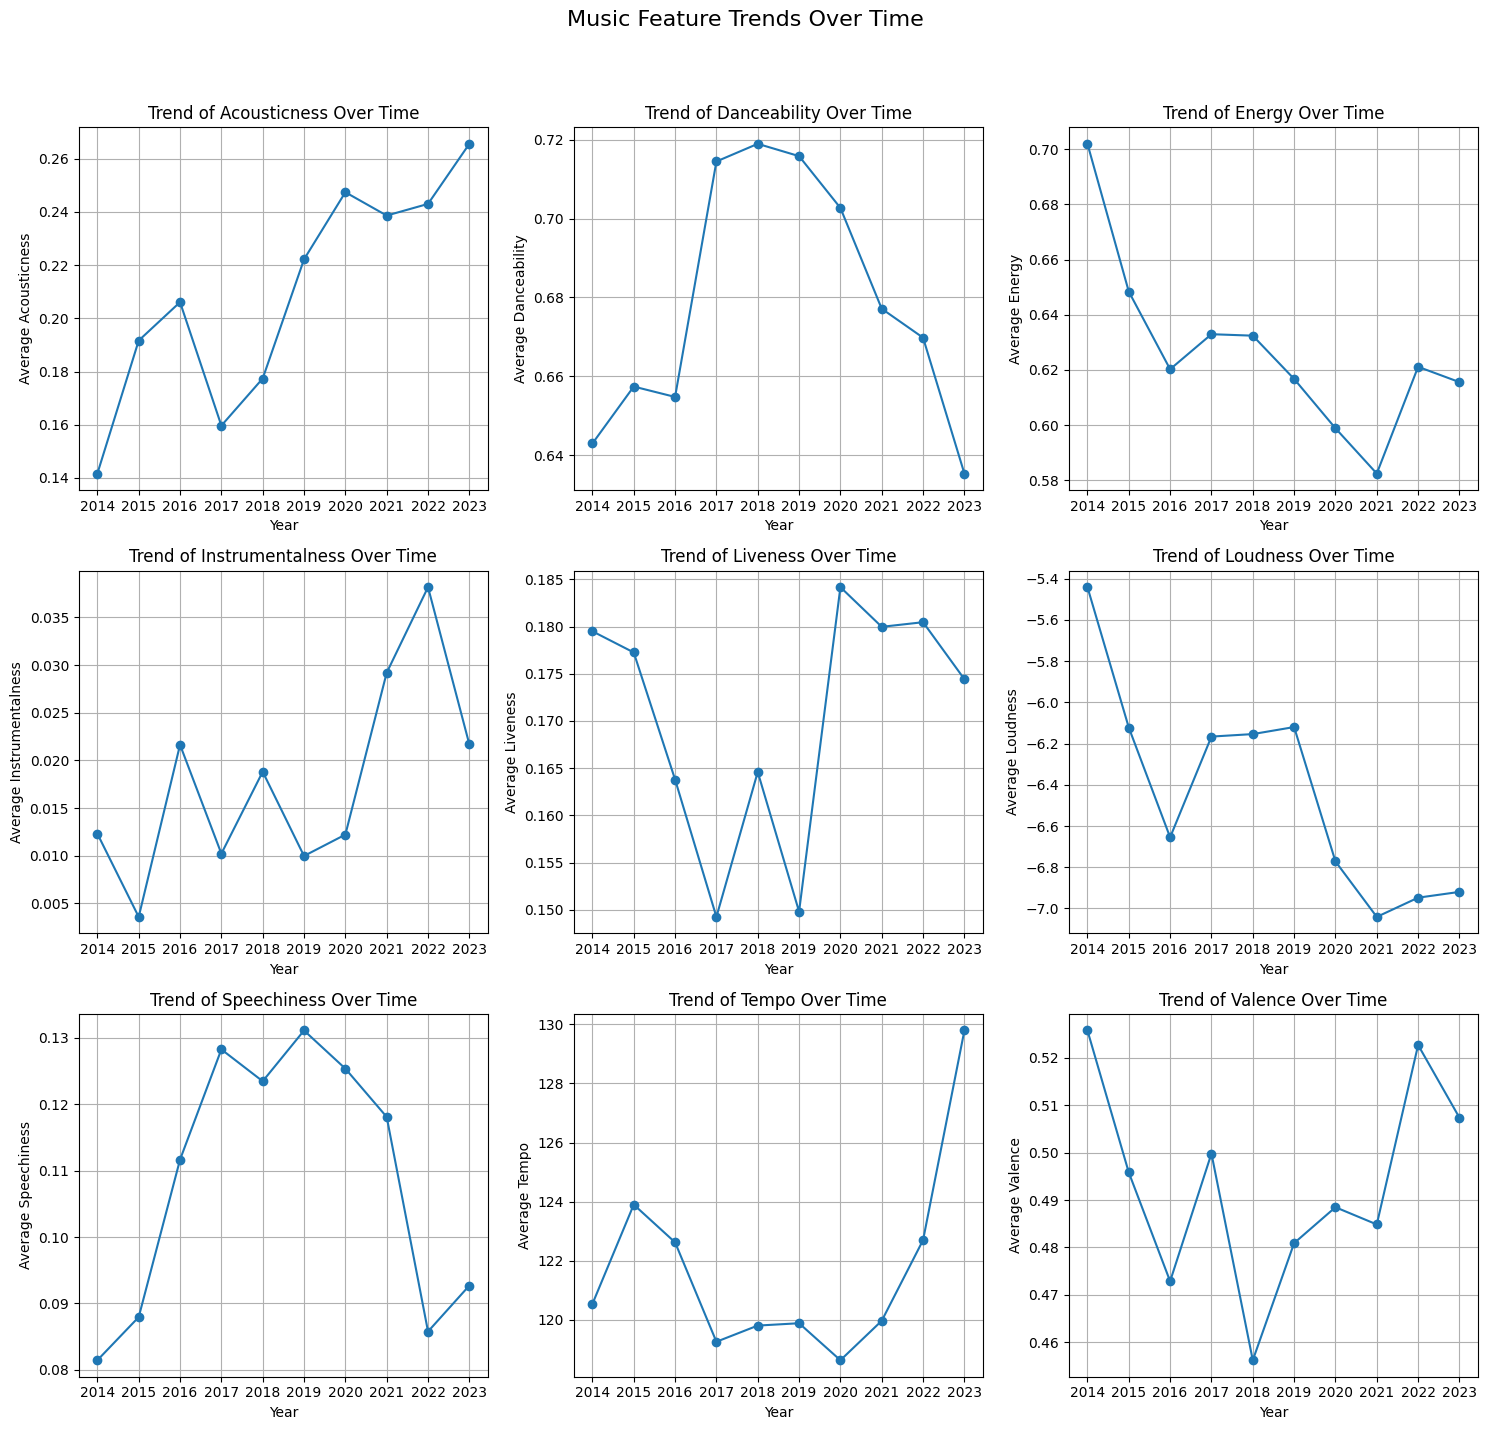

In [10]:
import matplotlib.pyplot as plt

# Plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Music Feature Trends Over Time', fontsize=16)

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Iterating over each feature to create a subplot
for i, feature in enumerate(mean_values_df.columns):
    axes[i].plot(mean_values_df.index[::-1], mean_values_df[feature][::-1], marker='o')  # Reversing the order for ascending years
    axes[i].set_title(f'Trend of {feature.capitalize()} Over Time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(f'Average {feature.capitalize()}')
    axes[i].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()